# Tara for IHOP

In [3]:
# imports
from importlib import reload
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.tara import io
from oceancolor.tara import spectra
from oceancolor.hydrolight import loisel23
from oceancolor.water import io as water_io
from oceancolor.utils import spectra as spec_utils

from sklearn import decomposition

#from wpca import WPCA

In [4]:
%matplotlib ipympl

In [5]:
def plot_a(wv, a, clr=None):
    fig = plt.figure(figsize=(6,6))
    plt.clf()
    ax = plt.gca()
    ax.plot(wv, a, color=clr)
    #
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel(r'a (m$^{-1}$)')
    plt.show()

# Load L23 data (for wavelengths)

In [6]:
l23_ds = loisel23.load_ds(4,0)

In [7]:
l23_ds.Lambda

<xarray.DataArray 'Lambda' (Lambda: 81)>
array([350., 355., 360., 365., 370., 375., 380., 385., 390., 395., 400., 405.,
       410., 415., 420., 425., 430., 435., 440., 445., 450., 455., 460., 465.,
       470., 475., 480., 485., 490., 495., 500., 505., 510., 515., 520., 525.,
       530., 535., 540., 545., 550., 555., 560., 565., 570., 575., 580., 585.,
       590., 595., 600., 605., 610., 615., 620., 625., 630., 635., 640., 645.,
       650., 655., 660., 665., 670., 675., 680., 685., 690., 695., 700., 705.,
       710., 715., 720., 725., 730., 735., 740., 745., 750.], dtype=float32)
Coordinates:
  * Lambda   (Lambda) float32 350.0 355.0 360.0 365.0 ... 740.0 745.0 750.0

## Cut to >400nm

In [8]:
cut = l23_ds.Lambda > 400.
wv_grid = l23_ds.Lambda.data[cut]

# Load Tara Table

In [9]:
tara_db = io.load_tara_db()

# Rebin the Spectra

In [10]:
wv_nm, all_a_p, all_a_p_sig = spectra.spectra_from_table(tara_db)

## Wavelengths for Tara (which bin without interpolation)

In [20]:
tara_wv = np.append(wv_grid, [755.]) - 2.5

In [21]:
reload(spectra)
#wv_grid = l23_ds.Lambda
rwv_nm, r_ap, r_sig = spectra.rebin_to_grid(wv_nm, all_a_p, all_a_p_sig, tara_wv)

In [22]:
rwv_nm

array([405., 410., 415., 420., 425., 430., 435., 440., 445., 450., 455.,
       460., 465., 470., 475., 480., 485., 490., 495., 500., 505., 510.,
       515., 520., 525., 530., 535., 540., 545., 550., 555., 560., 565.,
       570., 575., 580., 585., 590., 595., 600., 605., 610., 615., 620.,
       625., 630., 635., 640., 645., 650., 655., 660., 665., 670., 675.,
       680., 685., 690., 695., 700., 705., 710., 715., 720., 725., 730.,
       735., 740., 745., 750.])

# Add Water

## Load

In [23]:
df_water = water_io.load_rsr_gsfc()
df_water.head()

,wavelength,aw,bw
0,200.0,3.070,0.1510
1,201.0,2.962,0.1478
2,202.0,2.854,0.1446
3,203.0,2.746,0.1414
4,204.0,2.638,0.1382


## Rebin to our wavelengths

In [24]:
reload(spec_utils)
a_w, _ =  spec_utils.rebin(df_water.wavelength.values, 
                        df_water.aw.values, np.zeros_like(df_water.aw),
                        wv_grid)

## Check

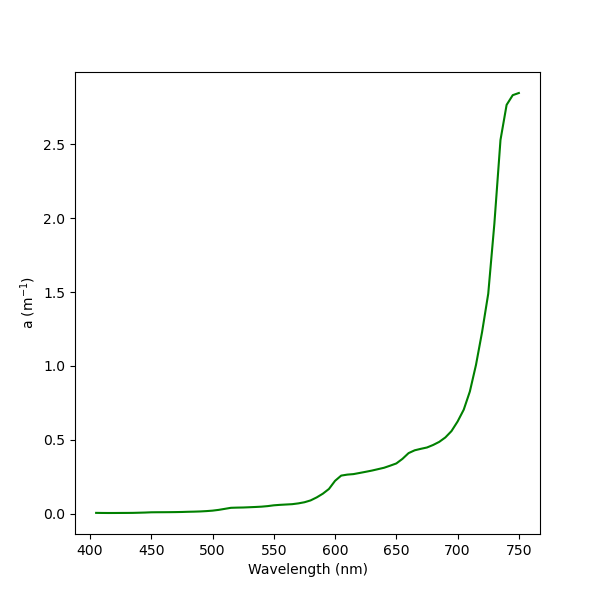

In [25]:
plot_a(wv_grid, a_w, clr='g')

# View

In [26]:
r_ap.shape

(302779, 70)

## 

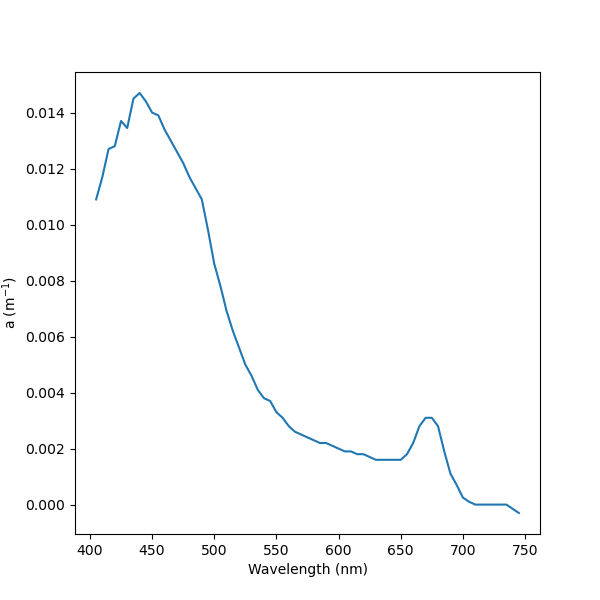

In [27]:
plot_a(rwv_nm, r_ap[100000,:])#, 'o')

## Now water

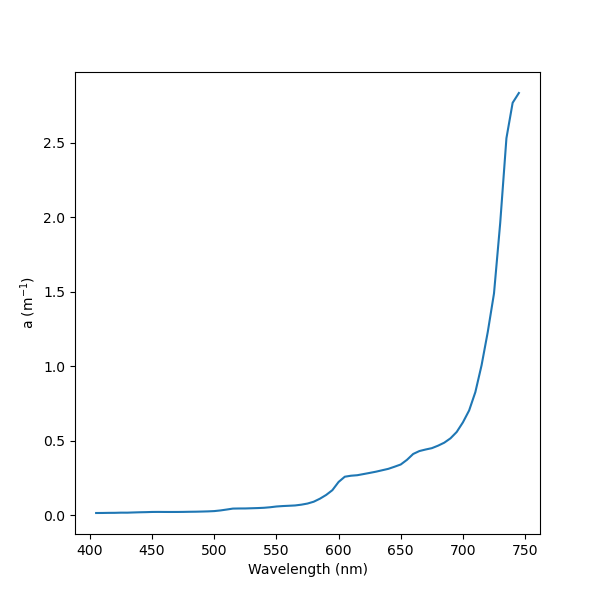

In [28]:
plot_a(rwv_nm, r_ap[100000,:]+a_w)#, 'o')